<a href="https://colab.research.google.com/github/sksuman97/WorldBank-Global-Education-Analysis/blob/main/Sumanta_Muduli_World_Bank_Global_Education_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
country_series=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/capstone project/data/EdStatsCountry-Series.csv')

In [5]:
country=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/capstone project/data/EdStatsCountry.csv')

In [6]:
stats_data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/capstone project/data/EdStatsData.csv')

In [7]:
footnote=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/capstone project/data/EdStatsFootNote.csv')

In [8]:
stats_series=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/capstone project/data/EdStatsSeries.csv')

In [9]:
country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [10]:
country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [11]:
# Drop the column unnamed as it does not have any non null values
del country_series['Unnamed: 3']

In [12]:
country_series.head()

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...


In [13]:
country_series['SeriesCode'].unique()

array(['SP.POP.TOTL', 'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD',
       'NY.GDP.MKTP.PP.KD', 'NY.GNP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.CD',
       'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1564.TO.ZS',
       'SP.POP.TOTL.MA.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.0014.TO.ZS',
       'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD',
       'SP.POP.1564.MA.IN', 'SP.POP.0014.TO', 'SP.POP.1564.TO',
       'SP.POP.1564.FE.IN', 'SP.POP.0014.MA.IN', 'SP.POP.0014.FE.IN'],
      dtype=object)

In [14]:
country_series['CountryCode'].unique().shape

(211,)

In [15]:
country_series['DESCRIPTION'].unique()

array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

In [16]:
country_series[['SeriesCode','DESCRIPTION']].iloc[40:100]

,SeriesCode,DESCRIPTION
40,SP.POP.TOTL,"Data sources : Eurostat, State Statistical Com..."
41,SP.POP.GROW,"Data sources: Eurostat, State Statistical Comm..."
42,SP.POP.GROW,Data sources: United Nations World Population ...
43,SP.POP.TOTL,Data sources : United Nations World Population...
44,SP.POP.TOTL,Data sources : Eurostat
45,SP.POP.GROW,Data sources : Eurostat
46,SP.POP.GROW,Data sources: United Nations World Population ...
47,SP.POP.TOTL,Data sources : United Nations World Population...
48,SP.POP.TOTL,Data sources : United Nations World Population...
49,SP.POP.GROW,Data sources: United Nations World Population ...


## One thing noticed that first two letters of series code and description column have certain relation but there are few deviations also.

In [17]:
country.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [188]:
country['Special Notes']

'SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.'

In [18]:
country['Short Name'].iloc[0:30]

0                      Aruba
1                Afghanistan
2                     Angola
3                    Albania
4                    Andorra
5                 Arab World
6       United Arab Emirates
7                  Argentina
8                    Armenia
9             American Samoa
10       Antigua and Barbuda
11                 Australia
12                   Austria
13                Azerbaijan
14                   Burundi
15                   Belgium
16                     Benin
17              Burkina Faso
18                Bangladesh
19                  Bulgaria
20                   Bahrain
21               The Bahamas
22    Bosnia and Herzegovina
23                   Belarus
24                    Belize
25                   Bermuda
26                   Bolivia
27                    Brazil
28                  Barbados
29                    Brunei
Name: Short Name, dtype: object

In [19]:
country['Table Name'].iloc[30:60]

30                                     Bhutan
31                                   Botswana
32                   Central African Republic
33                                     Canada
34                                Switzerland
35                            Channel Islands
36                                      Chile
37                                      China
38                              Côte d'Ivoire
39                                   Cameroon
40                           Congo, Dem. Rep.
41                                Congo, Rep.
42                                   Colombia
43                                    Comoros
44                                 Cabo Verde
45                                 Costa Rica
46                                       Cuba
47                                    Curaçao
48                             Cayman Islands
49                                     Cyprus
50                             Czech Republic
51                                

In [20]:
country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

It's sufficient to recognise a country with their short name, so need to keep columns like Table Name,Long Name

In [21]:
country.drop(['Table Name','Long Name'],axis=1,inplace=True)

In [22]:
country.head()

,Country Code,Short Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [23]:
country[country['2-alpha code']==country['WB-2 code']]

,Country Code,Short Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,WLD,World,1W,NaN,World aggregate.,NaN,NaN,1W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,WSM,Samoa,WS,Samoan tala,Fiscal year ends on June 30; reporting period ...,East Asia & Pacific,Lower middle income,WS,2002,NaN,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2009",NaN,NaN,2009,NaN,2012.0,NaN,NaN
238,ZAF,South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,2005,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,2005,"IMF Balance of Payments Manual, 6th edition.",Preliminary,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,

In [24]:
country[country['2-alpha code']!=country['WB-2 code']].shape

(8, 30)

from above observation it's clear that 233 rows are same for both so keeping only one column could help us and rows having both the column same value

In [25]:
index=country[country['2-alpha code']!=country['WB-2 code']].index

In [26]:
# Deleting rows having different value for columns 2-alpha code & WB-2 code
country.drop(index,inplace=True)

In [27]:
country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 240
Data columns (total 30 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       233 non-null    object 
 1   Short Name                                         233 non-null    object 
 2   2-alpha code                                       233 non-null    object 
 3   Currency Unit                                      207 non-null    object 
 4   Special Notes                                      139 non-null    object 
 5   Region                                             206 non-null    object 
 6   Income Group                                       206 non-null    object 
 7   WB-2 code                                          233 non-null    object 
 8   National accounts base year                        197 non-null    object 
 9   National a

In [28]:
# Remove columns name WB code as it's a clone of 2-alpha code an remove column Unnamed: 31 as it 0 nun null value
country.drop(['WB-2 code','Unnamed: 31'],axis=1,inplace=True)

In [29]:
country.head()

,Country Code,Short Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [30]:
country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 240
Data columns (total 28 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       233 non-null    object 
 1   Short Name                                         233 non-null    object 
 2   2-alpha code                                       233 non-null    object 
 3   Currency Unit                                      207 non-null    object 
 4   Special Notes                                      139 non-null    object 
 5   Region                                             206 non-null    object 
 6   Income Group                                       206 non-null    object 
 7   National accounts base year                        197 non-null    object 
 8   National accounts reference year                   30 non-null     float64
 9   SNA price 

In [31]:
country.iloc[:50]

,Country Code,Short Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN
5,ARB,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARE,United Arab Emirates,AE,U.A.E. dirham,April 2013 database update: Based on data from...,Middle East & North Africa,High income: nonOECD,2007,NaN,Value added at producer prices (VAP),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2010,NaN,NaN,NaN,2012,NaN,2011.0,2005
7,ARG,Argentina,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,2004,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,1971–84,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.0,2012.0,2000
8,ARM,Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Lower middle income,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System o

In [32]:
country['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [31]:
country[~country['Latest industrial data'].isnull()]

,Country Code,Short Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
3,ALB,Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
7,ARG,Argentina,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,2004,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,1971–84,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.0,2012.0,2000
11,AUS,Australia,AU,Australian dollar,Fiscal year end: June 30; reporting period for...,East Asia & Pacific,High income: OECD,Original chained constant price data are resca...,2012.0,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Expenditure survey/budget survey (ES/BS), 1994",Yes,2011,2010.0,2012.0,2000
12,AUT,Austria,AT,Euro,A simple multiplier is used to convert the nat...,Europe & Central Asia,High income: OECD,2005,NaN,Value added at basic prices (VAB),NaN,Euro area,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011. Population figures compiled from adminis...,NaN,"Income survey (IS), 2000",Yes,2010,2009.0,2012.0,2002
13,AZE,Azerbaijan,AZ,New Azeri manat,April 2012 database update: National accounts ...,Europe & Central Asia,Upper middle income,2000,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,1992–95,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2009,"Demographic and Health Survey (DHS), 2006","Expenditure survey/budget survey (ES/BS), 2012",Yes,2015,2010.0,2012.0,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,UGA,Uganda,UG,Ugandan shilling,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,2001/02,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1968 System of National Accou...,NaN,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2002,"HIV/AIDS Indicator Survey (AIS), 2011; Demogra...","Priority survey (PS), 2009/10",NaN,2008/ 2009,2000.0,2012.0,2002
226,URY,Uruguay,UY,Uruguayan peso,"In 2011, the Central Bank revised national acc...",Latin America & Caribbean,High income: nonOECD,2005,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,Na

In [32]:
stats_series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
list(stats_series['Long definition'].loc[:30])

['Percentage of female population age 15-19 with no education',
 'Percentage of population age 15-19 with no education',
 'Percentage of female population age 15+ with no education',
 'Percentage of population age 15+ with no education',
 'Percentage of female population age 20-24 with no education',
 'Percentage of population age 20-24 with no education',
 'Percentage of female population age 25-29 with no education',
 'Percentage of population age 25-29 with no education',
 'Percentage of female population age 25+ with no education',
 'Percentage of population age 25+ with no education',
 'Percentage of female population age 30-34 with no education',
 'Percentage of population age 30-34 with no education',
 'Percentage of female population age 35-39 with no education',
 'Percentage of population age 35-39 with no education',
 'Percentage of female population age 40-44 with no education',
 'Percentage of population age 40-44 with no education',
 'Percentage of female population age 45

In [33]:
stats_series['Indicator Name'].unique().shape

(3665,)

In [237]:
list(stats_series['Indicator Name'].loc[:50])

['Barro-Lee: Percentage of female population age 15-19 with no education',
 'Barro-Lee: Percentage of population age 15-19 with no education',
 'Barro-Lee: Percentage of female population age 15+ with no education',
 'Barro-Lee: Percentage of population age 15+ with no education',
 'Barro-Lee: Percentage of female population age 20-24 with no education',
 'Barro-Lee: Percentage of population age 20-24 with no education',
 'Barro-Lee: Percentage of female population age 25-29 with no education',
 'Barro-Lee: Percentage of population age 25-29 with no education',
 'Barro-Lee: Percentage of female population age 25+ with no education',
 'Barro-Lee: Percentage of population age 25+ with no education',
 'Barro-Lee: Percentage of female population age 30-34 with no education',
 'Barro-Lee: Percentage of population age 30-34 with no education',
 'Barro-Lee: Percentage of female population age 35-39 with no education',
 'Barro-Lee: Percentage of population age 35-39 with no education',
 'Barro

In [35]:
stats_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [236]:
stats_series['Topic'].unique().shape

(37,)

In [233]:
stats_series.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

##Remove the columns having no non null values

In [241]:
stats_series['Periodicity'].loc[~stats_series['Periodicity'].isna()]

610     Annual
611     Annual
1658    Annual
1659    Annual
1660    Annual
         ...  
2590    Annual
2591    Annual
2592    Annual
2593    Annual
2594    Annual
Name: Periodicity, Length: 99, dtype: object

#Periodicity is unnecessary

In [246]:
stats_series['Base Period'].loc[~stats_series['Base Period'].isna()]

1659                          2010
1661                          2011
1663                          2010
1665                          2011
1686    Projections (2010 to 2100)
                   ...            
1991    Projections (2010 to 2100)
1992    Projections (2010 to 2100)
1993    Projections (2010 to 2100)
2697                            14
2698                            14
Name: Base Period, Length: 314, dtype: object

#Base series is a unnecessary column

In [245]:
stats_series['Other notes'].loc[~stats_series['Other notes'].isna()]

612               EGRA
613               EGRA
614               EGRA
615               EGRA
616               EGRA
             ...      
3647         Secondary
3649    Post-secondary
3650          Tertiary
3663         Secondary
3664          Tertiary
Name: Other notes, Length: 552, dtype: object

In [250]:
stats_series=stats_series.drop(axis=1,columns=['Unit of measure','Other web links','Related indicators','License Type','Periodicity','Other notes','Base Period','Aggregation method','Unnamed: 20','Limitations and exceptions','Notes from original source','General comments','Statistical concept and methodology','Related source links','Development relevance'])

This data frame for stats_series is our filtered data

In [251]:
stats_series

,Series Code,Topic,Indicator Name,Short definition,Long definition,Source
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,Robert J. Barro and Jong-Wha Lee: http://www.b...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,Robert J. Barro and Jong-Wha Lee: http://www.b...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,Robert J. Barro and Jong-Wha Lee: http://www.b...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,Robert J. Barro and Jong-Wha Lee: http://www.b...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,Robert J. Barro and Jong-Wha Lee: http://www.b...
...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",UNESCO Institute for Statistics
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",UNESCO Institute for Statistics
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",UNESCO Institute for Statistics
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",UNESCO Institute for Statistics


In [33]:
# Deep dive into stats_data
stats_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
stats_data.shape

(886930, 70)

In [35]:
stats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

## We are storing only the years data from 2005-2017 as after that all are projections

In [36]:
required_columns=['Country Name','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2014','2015','2016','2017']

In [37]:
# We are updating our data with required columns only
stats_data=stats_data[required_columns]

In [38]:
stats_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,85.320152,NaN,NaN,NaN


In [39]:
# Let's check some insights for India
stats_data.loc[stats_data['Country Name']=='India']

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
414145,India,IND,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.614967,NaN,NaN,NaN,NaN,NaN
414146,India,IND,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.731750,NaN,NaN,NaN,NaN,NaN
414147,India,IND,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.055220,NaN,NaN,NaN,NaN,NaN
414148,India,IND,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.716110,NaN,NaN,NaN,NaN,NaN
414149,India,IND,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,96.96656,96.987038,95.643608,96.19281,9.576299e+01,96.984512,97.738869,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417805,India,IND,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,1.361671e+07,NaN,NaN,NaN,NaN,1.226385e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417806,India,IND,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,8.113086e+01,NaN,NaN,NaN,NaN,8.614488e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417807,India,IND,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,7.435573e+01,NaN,NaN,NaN,NaN,8.184981e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417808,India,IND,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,8.410200e-01,NaN,NaN,NaN,NaN,9.089900e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
stats_data.loc[stats_data['Country Name']=='India'].shape

(3665, 18)

In [41]:
# Lets store this dataframe called India
India=stats_data.loc[stats_data['Country Name']=='India'].reset_index(drop=True)

In [42]:
India

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
0,India,IND,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.614967,NaN,NaN,NaN,NaN,NaN
1,India,IND,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.731750,NaN,NaN,NaN,NaN,NaN
2,India,IND,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.055220,NaN,NaN,NaN,NaN,NaN
3,India,IND,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.716110,NaN,NaN,NaN,NaN,NaN
4,India,IND,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,96.96656,96.987038,95.643608,96.19281,9.576299e+01,96.984512,97.738869,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,India,IND,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,1.361671e+07,NaN,NaN,NaN,NaN,1.226385e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,India,IND,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,8.113086e+01,NaN,NaN,NaN,NaN,8.614488e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,India,IND,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,7.435573e+01,NaN,NaN,NaN,NaN,8.184981e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,India,IND,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,8.410200e-01,NaN,NaN,NaN,NaN,9.089900e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
India.shape

(3665, 18)

In [44]:
India['Indicator Name'].unique().shape

(3665,)

#Checking indicator column for dataframe India what this column really contains

In [45]:
India['Indicator Name'][0]

'Adjusted net enrolment rate, lower secondary, both sexes (%)'

In [46]:
India['Indicator Name'][1]

'Adjusted net enrolment rate, lower secondary, female (%)'

In [47]:
India['Indicator Name'][2]

'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)'

In [48]:
India['Indicator Name'][3]

'Adjusted net enrolment rate, lower secondary, male (%)'

In [49]:
India['Indicator Name'][4]

'Adjusted net enrolment rate, primary, both sexes (%)'

In [50]:
India['Indicator Name'][5]

'Adjusted net enrolment rate, primary, female (%)'

In [51]:
India['Indicator Name'][6]

'Adjusted net enrolment rate, primary, gender parity index (GPI)'

In [52]:
India['Indicator Name'][7]

'Adjusted net enrolment rate, primary, male (%)'

In [53]:
list(India['Indicator Name'].iloc[:100])

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

In [54]:
India[~India['2015'].isnull()]

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
702,India,IND,Duration of compulsory education (years),SE.COM.DURS,NaN,NaN,NaN,NaN,8.0,8.000000e+00,8.0,8.0,8.0,8.0,8.0,8.000000e+00,8.0,NaN
1177,India,IND,"Enrolment in pre-primary education, both sexes...",SE.PRE.ENRL,4761485.0,5264053.0,5366340.0,6576483.0,5839725.0,5.570382e+06,5936510.0,6073502.0,7376378.0,8967362.0,8967362.0,9.260581e+06,NaN,NaN
1178,India,IND,"Enrolment in pre-primary education, female (nu...",SE.PRE.ENRL.FE,2267044.0,2508509.0,2501557.0,3057985.0,2773450.0,2.622527e+06,2751776.0,2804519.0,3327344.0,4095686.0,4095686.0,4.233270e+06,NaN,NaN
1183,India,IND,"Enrolment in primary education, both sexes (nu...",SE.PRM.ENRL,NaN,NaN,137742640.0,139317984.0,138368128.0,1.384138e+08,137746816.0,139869904.0,141154752.0,137808912.0,137808912.0,1.385180e+08,NaN,NaN
1184,India,IND,"Enrolment in primary education, female (number)",SE.PRM.ENRL.FE,NaN,NaN,64643864.0,66304728.0,66260656.0,6.613586e+07,66063456.0,67231368.0,70505312.0,68796064.0,68796064.0,6.933046e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3652,India,IND,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MA,NaN,NaN,NaN,NaN,NaN,6.669156e+04,NaN,NaN,NaN,NaN,NaN,7.488007e+04,NaN,NaN
3653,India,IND,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MF,NaN,NaN,NaN,NaN,NaN,1.246230e+05,NaN,NaN,NaN,NaN,NaN,1.404780e+05,NaN,NaN
3654,India,IND,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.FE,NaN,NaN,NaN,NaN,NaN,7.657089e+04,NaN,NaN,NaN,NaN,NaN,9.644770e+04,NaN,NaN
3655,India,IND,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MA,NaN,NaN,NaN,NaN,NaN,1.155267e+05,NaN,NaN,NaN,NaN,NaN,1.352063e+05,NaN,NaN


#Lets play with the data having follwing Indicators as row which could result us to some useful insights about literacy
'Adult illiterate population, 15+ years, % female
'Adult illiterate population, 15+ years, both sexes (number)',
 'Adult illiterate population, 15+ years, female (number)',
 'Adult illiterate population, 15+ years, male (number)',
 'Adult literacy rate, population 15+ years, both sexes (%)',
 'Adult literacy rate, population 15+ years, female (%)',
 'Adult literacy rate, population 15+ years, gender parity index (GPI)',
 'Adult literacy rate, population 15+ years, male (%)']

In [55]:
India[India['Indicator Name']=='Adult illiterate population, 15+ years, % female']
 

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
16,India,IND,"Adult illiterate population, 15+ years, % female",UIS.LPP.AG15T99,NaN,65.15452,NaN,NaN,NaN,NaN,64.50005,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
India[India['Indicator Name']=='Adult illiterate population, 15+ years, both sexes (number)']

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
17,India,IND,"Adult illiterate population, 15+ years, both s...",UIS.LP.AG15T99,NaN,287691648.0,NaN,NaN,NaN,NaN,265567691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
India[India['Indicator Name']=='Adult illiterate population, 15+ years, female (number)']

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
18,India,IND,"Adult illiterate population, 15+ years, female...",UIS.LP.AG15T99.F,NaN,187444111.0,NaN,NaN,NaN,NaN,171291305.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
India[India['Indicator Name']=='Adult literacy rate, population 15+ years, both sexes (%)']

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
20,India,IND,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,NaN,62.75447,NaN,NaN,NaN,NaN,69.30256,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Make a table to store all literacy related data for india

In [59]:
india_literacy_table=India[India['Indicator Name'].str.contains('literacy', regex=False, case=False, na=False)].reset_index(drop=True)

In [60]:
india_literacy_table

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
0,India,IND,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,NaN,62.75447,NaN,NaN,NaN,NaN,69.30256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,IND,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,NaN,50.82376,NaN,NaN,NaN,NaN,59.27732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,IND,"Adult literacy rate, population 15+ years, gen...",UIS.LR.AG15T99.GPI,NaN,0.67592,NaN,NaN,NaN,NaN,0.75151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,IND,"Adult literacy rate, population 15+ years, mal...",SE.ADT.LITR.MA.ZS,NaN,75.19190,NaN,NaN,NaN,NaN,78.87723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,IND,"Elderly literacy rate, population 65+ years, b...",UIS.LR.AG65,NaN,35.22215,NaN,NaN,NaN,NaN,41.60357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,India,IND,"Elderly literacy rate, population 65+ years, f...",UIS.LR.AG65.F,NaN,18.29690,NaN,NaN,NaN,NaN,26.69628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,India,IND,"Elderly literacy rate, population 65+ years, g...",UIS.LR.AG65.GPI,NaN,0.35522,NaN,NaN,NaN,NaN,0.46691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,India,IND,"Elderly literacy rate, population 65+ years, m...",UIS.LR.AG65.M,NaN,51.50850,NaN,NaN,NaN,NaN,57.17637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,India,IND,"Literacy rate, population 25-64 years, both se...",UIS.LR.AG25T64,NaN,58.32757,NaN,NaN,NaN,NaN,65.43287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,India,IND,"Literacy rate, population 25-64 years, female (%)",UIS.LR.AG25T64.F,NaN,44.47528,NaN,NaN,NaN,NaN,53.99607,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above dataset it could be seen ,we have literacy related data only for 2006,2011 year

In [61]:
# Droping those indicator rows from the dataset which indicators don't have any data
india_literacy_table.dropna(axis=0,subset=['2006','2011'],inplace=True)

In [62]:
india_literacy_table

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
0,India,IND,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,NaN,62.75447,NaN,NaN,NaN,NaN,69.30256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,IND,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,NaN,50.82376,NaN,NaN,NaN,NaN,59.27732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,IND,"Adult literacy rate, population 15+ years, gen...",UIS.LR.AG15T99.GPI,NaN,0.67592,NaN,NaN,NaN,NaN,0.75151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,IND,"Adult literacy rate, population 15+ years, mal...",SE.ADT.LITR.MA.ZS,NaN,75.19190,NaN,NaN,NaN,NaN,78.87723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,IND,"Elderly literacy rate, population 65+ years, b...",UIS.LR.AG65,NaN,35.22215,NaN,NaN,NaN,NaN,41.60357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,India,IND,"Elderly literacy rate, population 65+ years, f...",UIS.LR.AG65.F,NaN,18.29690,NaN,NaN,NaN,NaN,26.69628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,India,IND,"Elderly literacy rate, population 65+ years, g...",UIS.LR.AG65.GPI,NaN,0.35522,NaN,NaN,NaN,NaN,0.46691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,India,IND,"Elderly literacy rate, population 65+ years, m...",UIS.LR.AG65.M,NaN,51.50850,NaN,NaN,NaN,NaN,57.17637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,India,IND,"Literacy rate, population 25-64 years, both se...",UIS.LR.AG25T64,NaN,58.32757,NaN,NaN,NaN,NaN,65.43287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,India,IND,"Literacy rate, population 25-64 years, female (%)",UIS.LR.AG25T64.F,NaN,44.47528,NaN,NaN,NaN,NaN,53.99607,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# vizualise growth of various literacy related indicators across years

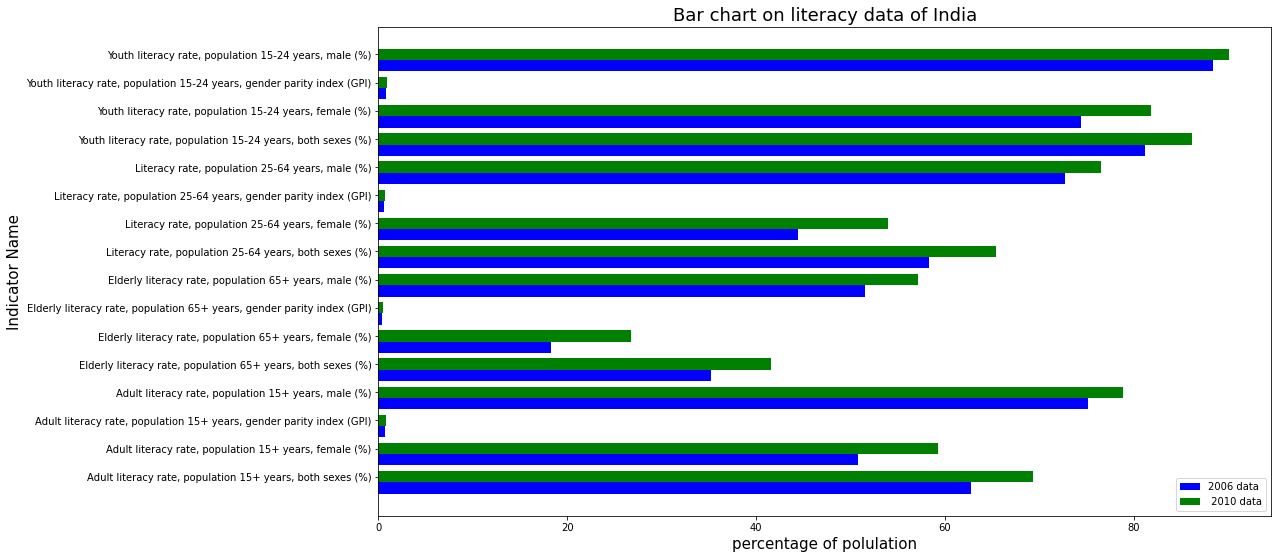

In [63]:
plt.figure(figsize=(16,9))
 
indicator_index = np.arange(len(india_literacy_table['Indicator Name']))
 
width = 0.4
 
plt.barh(indicator_index, india_literacy_table['2006'], width , color = "b",
        label ="2006 data") #visible=False
 
plt.barh(indicator_index + width, india_literacy_table['2011'], width , color = "g",
        label =" 2010 data") 
 
 
plt.yticks(indicator_index + width, india_literacy_table['Indicator Name'], rotation = 0)
plt.title("Bar chart on literacy data of India", fontsize = 18)
plt.ylabel("Indicator Name",fontsize = 15)
plt.xlabel("percentage of polulation", fontsize = 15)
plt.legend()
plt.show()

# Let's do this analysis for our beloving neighbour 'Pakistan'

In [153]:
Pakistan=stats_data.loc[stats_data['Country Name']=='Pakistan'].reset_index(drop=True)

#Extract literacy related data rows for now

In [154]:
pakistan_literacy_table=Pakistan[Pakistan['Indicator Name'].str.contains('literacy', regex=False, case=False, na=False)].reset_index(drop=True)

In [155]:
pakistan_literacy_table

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
0,Pakistan,PAK,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,49.87364,54.15121,NaN,55.52637,54.89264,55.37519,54.73802,56.76434,55.59499,56.97715,56.97715,NaN,NaN,NaN
1,Pakistan,PAK,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,35.36752,39.61323,NaN,40.08118,40.31462,41.01553,41.97539,43.07189,41.97494,44.28342,44.28342,NaN,NaN,NaN
2,Pakistan,PAK,"Adult literacy rate, population 15+ years, gen...",UIS.LR.AG15T99.GPI,0.55210,0.58555,NaN,0.58202,0.58744,0.59529,0.62658,0.61656,0.61162,0.64117,0.64117,NaN,NaN,NaN
3,Pakistan,PAK,"Adult literacy rate, population 15+ years, mal...",SE.ADT.LITR.MA.ZS,64.06048,67.65184,NaN,68.86610,68.62762,68.90061,66.99114,69.85822,68.62934,69.06681,69.06681,NaN,NaN,NaN
4,Pakistan,PAK,"Elderly literacy rate, population 65+ years, b...",UIS.LR.AG65,20.51553,24.35572,NaN,25.58964,24.85196,24.85196,23.97586,25.50246,24.50798,25.29323,25.29323,NaN,NaN,NaN
5,Pakistan,PAK,"Elderly literacy rate, population 65+ years, f...",UIS.LR.AG65.F,7.68449,9.60072,NaN,9.23423,9.38757,23.75533,9.88372,9.48671,9.13180,9.96258,9.96258,NaN,NaN,NaN
6,Pakistan,PAK,"Elderly literacy rate, population 65+ years, g...",UIS.LR.AG65.GPI,0.25725,0.27925,NaN,0.25502,0.26240,0.66402,0.29307,0.25776,0.25858,0.27902,0.27902,NaN,NaN,NaN
7,Pakistan,PAK,"Elderly literacy rate, population 65+ years, m...",UIS.LR.AG65.M,29.87139,34.37976,NaN,36.20942,35.77518,35.77518,33.72525,36.80466,35.31457,35.70521,35.70521,NaN,NaN,NaN
8,Pakistan,PAK,"Literacy rate, population 25-64 years, both se...",UIS.LR.AG25T64,43.70568,47.76307,NaN,48.96559,48.20804,48.68411,48.02751,49.95342,48.79480,50.17697,50.17697,NaN,NaN,NaN
9,Pakistan,PAK,"Literacy rate, population 25-64 years, female (%)",UIS.LR.AG25T64.F,27.32490,30.62113,NaN,30.06811,30.31176,30.98942,31.91161,32.66763,31.70222,33.77221,33.77221,NaN,NaN,NaN


#In the above dataset let's drop those rows for which we don't have any data at all

In [156]:
pakistan_literacy_table.dropna(axis=0,subset=['2005','2006',	'2007'	,'2008',	'2009'	,'2010',	'2011'	,'2012'	,'2013'	,'2014',	'2014'	,'2015'	,'2016'],how='all',inplace=True)

In [157]:
pakistan_literacy_table

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
0,Pakistan,PAK,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,49.87364,54.15121,NaN,55.52637,54.89264,55.37519,54.73802,56.76434,55.59499,56.97715,56.97715,NaN,NaN,NaN
1,Pakistan,PAK,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,35.36752,39.61323,NaN,40.08118,40.31462,41.01553,41.97539,43.07189,41.97494,44.28342,44.28342,NaN,NaN,NaN
2,Pakistan,PAK,"Adult literacy rate, population 15+ years, gen...",UIS.LR.AG15T99.GPI,0.55210,0.58555,NaN,0.58202,0.58744,0.59529,0.62658,0.61656,0.61162,0.64117,0.64117,NaN,NaN,NaN
3,Pakistan,PAK,"Adult literacy rate, population 15+ years, mal...",SE.ADT.LITR.MA.ZS,64.06048,67.65184,NaN,68.86610,68.62762,68.90061,66.99114,69.85822,68.62934,69.06681,69.06681,NaN,NaN,NaN
4,Pakistan,PAK,"Elderly literacy rate, population 65+ years, b...",UIS.LR.AG65,20.51553,24.35572,NaN,25.58964,24.85196,24.85196,23.97586,25.50246,24.50798,25.29323,25.29323,NaN,NaN,NaN
5,Pakistan,PAK,"Elderly literacy rate, population 65+ years, f...",UIS.LR.AG65.F,7.68449,9.60072,NaN,9.23423,9.38757,23.75533,9.88372,9.48671,9.13180,9.96258,9.96258,NaN,NaN,NaN
6,Pakistan,PAK,"Elderly literacy rate, population 65+ years, g...",UIS.LR.AG65.GPI,0.25725,0.27925,NaN,0.25502,0.26240,0.66402,0.29307,0.25776,0.25858,0.27902,0.27902,NaN,NaN,NaN
7,Pakistan,PAK,"Elderly literacy rate, population 65+ years, m...",UIS.LR.AG65.M,29.87139,34.37976,NaN,36.20942,35.77518,35.77518,33.72525,36.80466,35.31457,35.70521,35.70521,NaN,NaN,NaN
8,Pakistan,PAK,"Literacy rate, population 25-64 years, both se...",UIS.LR.AG25T64,43.70568,47.76307,NaN,48.96559,48.20804,48.68411,48.02751,49.95342,48.79480,50.17697,50.17697,NaN,NaN,NaN
9,Pakistan,PAK,"Literacy rate, population 25-64 years, female (%)",UIS.LR.AG25T64.F,27.32490,30.62113,NaN,30.06811,30.31176,30.98942,31.91161,32.66763,31.70222,33.77221,33.77221,NaN,NaN,NaN


In [158]:
pakistan_literacy_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 49
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    16 non-null     object 
 1   Country Code    16 non-null     object 
 2   Indicator Name  16 non-null     object 
 3   Indicator Code  16 non-null     object 
 4   2005            16 non-null     float64
 5   2006            16 non-null     float64
 6   2007            0 non-null      float64
 7   2008            16 non-null     float64
 8   2009            16 non-null     float64
 9   2010            16 non-null     float64
 10  2011            16 non-null     float64
 11  2012            16 non-null     float64
 12  2013            16 non-null     float64
 13  2014            16 non-null     float64
 14  2014            16 non-null     float64
 15  2015            0 non-null      float64
 16  2016            0 non-null      float64
 17  2017            0 non-null      float

# We can remove 2007,2015,2016,2017 column as it don't have any data

In [159]:
pakistan_literacy_table.drop(columns=['2007','2015','2016','2017'],inplace=True)

In [160]:
# This data have two 2014 column so let's drop the duplicate
pakistan_literacy_table=pakistan_literacy_table.loc[:,~pakistan_literacy_table.columns.duplicated()]

In [161]:
pakistan_literacy_table

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2008,2009,2010,2011,2012,2013,2014
0,Pakistan,PAK,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,49.87364,54.15121,55.52637,54.89264,55.37519,54.73802,56.76434,55.59499,56.97715
1,Pakistan,PAK,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,35.36752,39.61323,40.08118,40.31462,41.01553,41.97539,43.07189,41.97494,44.28342
2,Pakistan,PAK,"Adult literacy rate, population 15+ years, gen...",UIS.LR.AG15T99.GPI,0.55210,0.58555,0.58202,0.58744,0.59529,0.62658,0.61656,0.61162,0.64117
3,Pakistan,PAK,"Adult literacy rate, population 15+ years, mal...",SE.ADT.LITR.MA.ZS,64.06048,67.65184,68.86610,68.62762,68.90061,66.99114,69.85822,68.62934,69.06681
4,Pakistan,PAK,"Elderly literacy rate, population 65+ years, b...",UIS.LR.AG65,20.51553,24.35572,25.58964,24.85196,24.85196,23.97586,25.50246,24.50798,25.29323
5,Pakistan,PAK,"Elderly literacy rate, population 65+ years, f...",UIS.LR.AG65.F,7.68449,9.60072,9.23423,9.38757,23.75533,9.88372,9.48671,9.13180,9.96258
6,Pakistan,PAK,"Elderly literacy rate, population 65+ years, g...",UIS.LR.AG65.GPI,0.25725,0.27925,0.25502,0.26240,0.66402,0.29307,0.25776,0.25858,0.27902
7,Pakistan,PAK,"Elderly literacy rate, population 65+ years, m...",UIS.LR.AG65.M,29.87139,34.37976,36.20942,35.77518,35.77518,33.72525,36.80466,35.31457,35.70521
8,Pakistan,PAK,"Literacy rate, population 25-64 years, both se...",UIS.LR.AG25T64,43.70568,47.76307,48.96559,48.20804,48.68411,48.02751,49.95342,48.79480,50.17697
9,Pakistan,PAK,"Literacy rate, population 25-64 years, female (%)",UIS.LR.AG25T64.F,27.32490,30.62113,30.06811,30.31176,30.98942,31.91161,32.66763,31.70222,33.77221


In [162]:
pakistan_literacy_table.reset_index(drop=True,inplace=True)

In [163]:
pakistan_literacy_table

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2008,2009,2010,2011,2012,2013,2014
0,Pakistan,PAK,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,49.87364,54.15121,55.52637,54.89264,55.37519,54.73802,56.76434,55.59499,56.97715
1,Pakistan,PAK,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,35.36752,39.61323,40.08118,40.31462,41.01553,41.97539,43.07189,41.97494,44.28342
2,Pakistan,PAK,"Adult literacy rate, population 15+ years, gen...",UIS.LR.AG15T99.GPI,0.55210,0.58555,0.58202,0.58744,0.59529,0.62658,0.61656,0.61162,0.64117
3,Pakistan,PAK,"Adult literacy rate, population 15+ years, mal...",SE.ADT.LITR.MA.ZS,64.06048,67.65184,68.86610,68.62762,68.90061,66.99114,69.85822,68.62934,69.06681
4,Pakistan,PAK,"Elderly literacy rate, population 65+ years, b...",UIS.LR.AG65,20.51553,24.35572,25.58964,24.85196,24.85196,23.97586,25.50246,24.50798,25.29323
5,Pakistan,PAK,"Elderly literacy rate, population 65+ years, f...",UIS.LR.AG65.F,7.68449,9.60072,9.23423,9.38757,23.75533,9.88372,9.48671,9.13180,9.96258
6,Pakistan,PAK,"Elderly literacy rate, population 65+ years, g...",UIS.LR.AG65.GPI,0.25725,0.27925,0.25502,0.26240,0.66402,0.29307,0.25776,0.25858,0.27902
7,Pakistan,PAK,"Elderly literacy rate, population 65+ years, m...",UIS.LR.AG65.M,29.87139,34.37976,36.20942,35.77518,35.77518,33.72525,36.80466,35.31457,35.70521
8,Pakistan,PAK,"Literacy rate, population 25-64 years, both se...",UIS.LR.AG25T64,43.70568,47.76307,48.96559,48.20804,48.68411,48.02751,49.95342,48.79480,50.17697
9,Pakistan,PAK,"Literacy rate, population 25-64 years, female (%)",UIS.LR.AG25T64.F,27.32490,30.62113,30.06811,30.31176,30.98942,31.91161,32.66763,31.70222,33.77221


#making a copy of this dataframe for future use

In [164]:
pakistan_literacy_table_new=pakistan_literacy_table.copy()

Plot multiline to vizualise the trend of indicators

In [165]:
pakistan_literacy_table[['2005','2006','2008','2009','2010','2011','2012','2013','2014']]

,2005,2006,2008,2009,2010,2011,2012,2013,2014
0,49.87364,54.15121,55.52637,54.89264,55.37519,54.73802,56.76434,55.59499,56.97715
1,35.36752,39.61323,40.08118,40.31462,41.01553,41.97539,43.07189,41.97494,44.28342
2,0.55210,0.58555,0.58202,0.58744,0.59529,0.62658,0.61656,0.61162,0.64117
3,64.06048,67.65184,68.86610,68.62762,68.90061,66.99114,69.85822,68.62934,69.06681
4,20.51553,24.35572,25.58964,24.85196,24.85196,23.97586,25.50246,24.50798,25.29323
5,7.68449,9.60072,9.23423,9.38757,23.75533,9.88372,9.48671,9.13180,9.96258
6,0.25725,0.27925,0.25502,0.26240,0.66402,0.29307,0.25776,0.25858,0.27902
7,29.87139,34.37976,36.20942,35.77518,35.77518,33.72525,36.80466,35.31457,35.70521
8,43.70568,47.76307,48.96559,48.20804,48.68411,48.02751,49.95342,48.79480,50.17697
9,27.32490,30.62113,30.06811,30.31176,30.98942,31.91161,32.66763,31.70222,33.77221


In [167]:
pakistan_literacy_table['Indicator Name']

0     Adult literacy rate, population 15+ years, bot...
1     Adult literacy rate, population 15+ years, fem...
2     Adult literacy rate, population 15+ years, gen...
3     Adult literacy rate, population 15+ years, mal...
4     Elderly literacy rate, population 65+ years, b...
5     Elderly literacy rate, population 65+ years, f...
6     Elderly literacy rate, population 65+ years, g...
7     Elderly literacy rate, population 65+ years, m...
8     Literacy rate, population 25-64 years, both se...
9     Literacy rate, population 25-64 years, female (%)
10    Literacy rate, population 25-64 years, gender ...
11      Literacy rate, population 25-64 years, male (%)
12    Youth literacy rate, population 15-24 years, b...
13    Youth literacy rate, population 15-24 years, f...
14    Youth literacy rate, population 15-24 years, g...
15    Youth literacy rate, population 15-24 years, m...
Name: Indicator Name, dtype: object

#Droping unnecessary columns for vizualisation

In [168]:
pakistan_literacy_table.drop(columns=['Country Name','Country Code','Indicator Code'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [169]:
pakistan_literacy_table.set_index('Indicator Name',inplace=True)

In [170]:
pakistan_literacy_table

,2005,2006,2008,2009,2010,2011,2012,2013,2014
Indicator Name,,,,,,,,,
"Adult literacy rate, population 15+ years, both sexes (%)",49.87364,54.15121,55.52637,54.89264,55.37519,54.73802,56.76434,55.59499,56.97715
"Adult literacy rate, population 15+ years, female (%)",35.36752,39.61323,40.08118,40.31462,41.01553,41.97539,43.07189,41.97494,44.28342
"Adult literacy rate, population 15+ years, gender parity index (GPI)",0.55210,0.58555,0.58202,0.58744,0.59529,0.62658,0.61656,0.61162,0.64117
"Adult literacy rate, population 15+ years, male (%)",64.06048,67.65184,68.86610,68.62762,68.90061,66.99114,69.85822,68.62934,69.06681
"Elderly literacy rate, population 65+ years, both sexes (%)",20.51553,24.35572,25.58964,24.85196,24.85196,23.97586,25.50246,24.50798,25.29323
"Elderly literacy rate, population 65+ years, female (%)",7.68449,9.60072,9.23423,9.38757,23.75533,9.88372,9.48671,9.13180,9.96258
"Elderly literacy rate, population 65+ years, gender parity index (GPI)",0.25725,0.27925,0.25502,0.26240,0.66402,0.29307,0.25776,0.25858,0.27902
"Elderly literacy rate, population 65+ years, male (%)",29.87139,34.37976,36.20942,35.77518,35.77518,33.72525,36.80466,35.31457,35.70521
"Literacy rate, population 25-64 years, both sexes (%)",43.70568,47.76307,48.96559,48.20804,48.68411,48.02751,49.95342,48.79480,50.17697


In [171]:
pakistan_literacy_table.transpose()

Indicator Name,"Adult literacy rate, population 15+ years, both sexes (%)","Adult literacy rate, population 15+ years, female (%)","Adult literacy rate, population 15+ years, gender parity index (GPI)","Adult literacy rate, population 15+ years, male (%)","Elderly literacy rate, population 65+ years, both sexes (%)","Elderly literacy rate, population 65+ years, female (%)","Elderly literacy rate, population 65+ years, gender parity index (GPI)","Elderly literacy rate, population 65+ years, male (%)","Literacy rate, population 25-64 years, both sexes (%)","Literacy rate, population 25-64 years, female (%)","Literacy rate, population 25-64 years, gender parity index (GPI)","Literacy rate, population 25-64 years, male (%)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
2005,49.87364,35.36752,0.55210,64.06048,20.51553,7.68449,0.25725,29.87139,43.70568,27.32490,0.45270,60.36029,65.08658,53.08856,0.69259,76.65172
2006,54.15121,39.61323,0.58555,67.65184,24.35572,9.60072,0.27925,34.37976,47.76307,30.62113,0.47631,64.28887,69.16580,58.37056,0.73791,79.10218
2008,55.52637,40.08118,0.58202,68.86610,25.58964,9.23423,0.25502,36.20942,48.96559,30.06811,0.45530,66.04055,71.11291,61.24992,0.77121,79.42005
2009,54.89264,40.31462,0.58744,68.62762,24.85196,9.38757,0.26240,35.77518,48.20804,30.31176,0.46033,65.84823,70.67627,61.46266,0.77659,79.14432
2010,55.37519,41.01553,0.59529,68.90061,24.85196,23.75533,0.66402,35.77518,48.68411,30.98942,0.46879,66.10507,71.25962,62.29837,0.78359,79.50414
2011,54.73802,41.97539,0.62658,66.99114,23.97586,9.88372,0.29307,33.72525,48.02751,31.91161,0.49775,64.11115,70.76933,63.13681,0.80901,78.04242
2012,56.76434,43.07189,0.61656,69.85822,25.50246,9.48671,0.25776,36.80466,49.95342,32.66763,0.48707,67.06964,72.58342,64.47410,0.80303,80.28826
2013,55.59499,41.97494,0.61162,68.62934,24.50798,9.13180,0.25858,35.31457,48.79480,31.70222,0.48190,65.78542,71.63622,63.43800,0.79893,79.40381
2014,56.97715,44.28342,0.64117,69.06681,25.29323,9.96258,0.27902,35.70521,50.17697,33.77221,0.50980,66.24577,72.79540,65.54779,0.82175,79.76598


In [172]:
pakistan_literacy_table_new=pakistan_literacy_table.iloc[:]

Text(0.5, 0, 'Year')

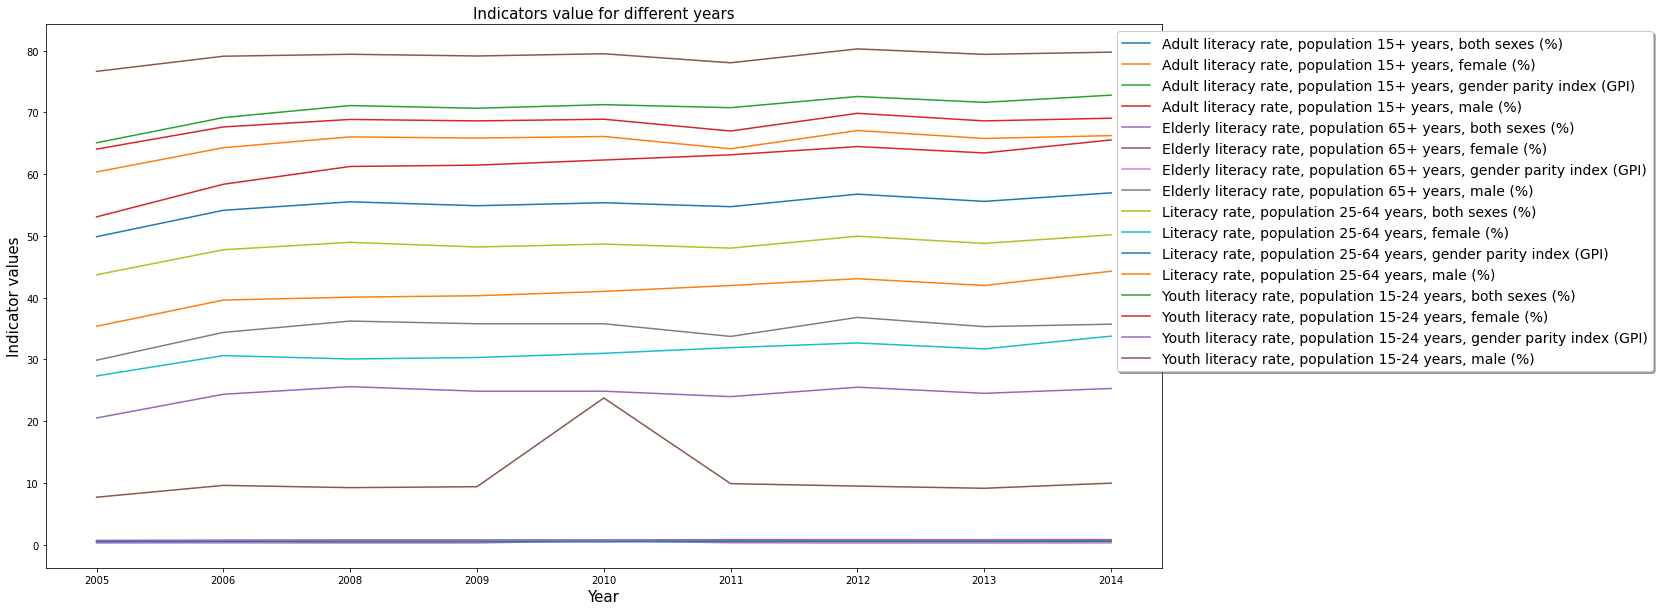

In [173]:
# plt.figure()
pakistan_literacy_table.transpose().plot(figsize=(20,10))

plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),shadow=True,fontsize=14)
plt.title('Indicators value for different years',fontsize=15)
plt.ylabel('Indicator values',fontsize=15)
plt.xlabel('Year',fontsize=15)

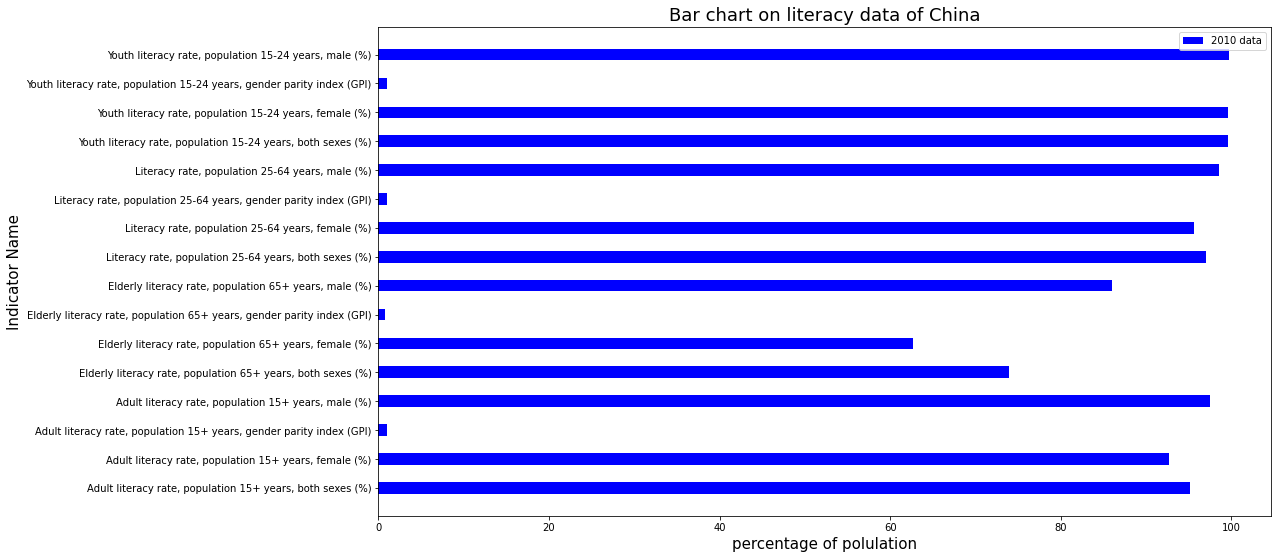

In [174]:
plt.figure(figsize=(16,9))
 
indicator_index = np.arange(len(pakis_literacy_data['Indicator Name']))
 
width = 0.4
 
plt.barh(indicator_index, china_literacy_data['2010'], width , color = "b",
        label ="2010 data") #visible=False
 
 
plt.yticks(indicator_index, china_literacy_data['Indicator Name'], rotation = 0)
plt.title("Bar chart on literacy data of China", fontsize = 18)
plt.ylabel("Indicator Name",fontsize = 15)
plt.xlabel("percentage of polulation", fontsize = 15)
plt.legend()
plt.show()

### 'Pakistan is improving' is a myth.

In [113]:
stats_data['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


##Let's do this analysis for China

In [117]:
China=stats_data.loc[stats_data['Country Name']=='China'].reset_index(drop=True)

In [119]:
China.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3665 non-null   object 
 1   Country Code    3665 non-null   object 
 2   Indicator Name  3665 non-null   object 
 3   Indicator Code  3665 non-null   object 
 4   2005            653 non-null    float64
 5   2006            563 non-null    float64
 6   2007            622 non-null    float64
 7   2008            619 non-null    float64
 8   2009            713 non-null    float64
 9   2010            1368 non-null   float64
 10  2011            566 non-null    float64
 11  2012            642 non-null    float64
 12  2013            678 non-null    float64
 13  2014            561 non-null    float64
 14  2014            561 non-null    float64
 15  2015            751 non-null    float64
 16  2016            72 non-null     float64
 17  2017            0 non-null      f

We will take data only till 2010

In [120]:
China.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2014', '2015', '2016', '2017'],
      dtype='object')

In [122]:
China=China[['Indicator Name','2010', '2011', '2012', '2013',
       '2014', '2014', '2015', '2016', '2017']]

In [123]:
China

,Indicator Name,2010,2011,2012,2013,2014,2014,2014,2014,2015,2016,2017
0,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Adjusted net enrolment rate, primary, both sex...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3660,"Youth illiterate population, 15-24 years, male...",383703.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,"Youth literacy rate, population 15-24 years, b...",99.64229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,"Youth literacy rate, population 15-24 years, f...",99.59304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,"Youth literacy rate, population 15-24 years, g...",0.99903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
# Let's filter out those rows only which contains the literacy data
china_literacy_data=China[China['Indicator Name'].str.contains('literacy', regex=False, case=False, na=False)].reset_index(drop=True)

In [131]:
china_literacy_data

,Indicator Name,2010,2011,2012,2013,2014,2014,2014,2014,2015,2016,2017
0,"Adult literacy rate, population 15+ years, bot...",95.12448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Adult literacy rate, population 15+ years, fem...",92.71123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Adult literacy rate, population 15+ years, gen...",0.95108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Adult literacy rate, population 15+ years, mal...",97.47946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Elderly literacy rate, population 65+ years, b...",73.90746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Elderly literacy rate, population 65+ years, f...",62.64322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Elderly literacy rate, population 65+ years, g...",0.72789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Elderly literacy rate, population 65+ years, m...",86.06095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Literacy rate, population 25-64 years, both se...",97.07986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Literacy rate, population 25-64 years, female (%)",95.60950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove those rows whose atleast one column have NaN value

In [133]:
china_literacy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  50 non-null     object 
 1   2010            16 non-null     float64
 2   2011            0 non-null      float64
 3   2012            0 non-null      float64
 4   2013            0 non-null      float64
 5   2014            0 non-null      float64
 6   2014            0 non-null      float64
 7   2014            0 non-null      float64
 8   2014            0 non-null      float64
 9   2015            0 non-null      float64
 10  2016            0 non-null      float64
 11  2017            0 non-null      float64
dtypes: float64(11), object(1)
memory usage: 4.8+ KB


In [137]:
# Updating our data frame with only 2010 column only
china_literacy_data=china_literacy_data[['Indicator Name','2010']]

In [141]:
# Drop those rows which have nan values
china_literacy_data.dropna(subset=['2010'],axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


plot bar plot vizualise it

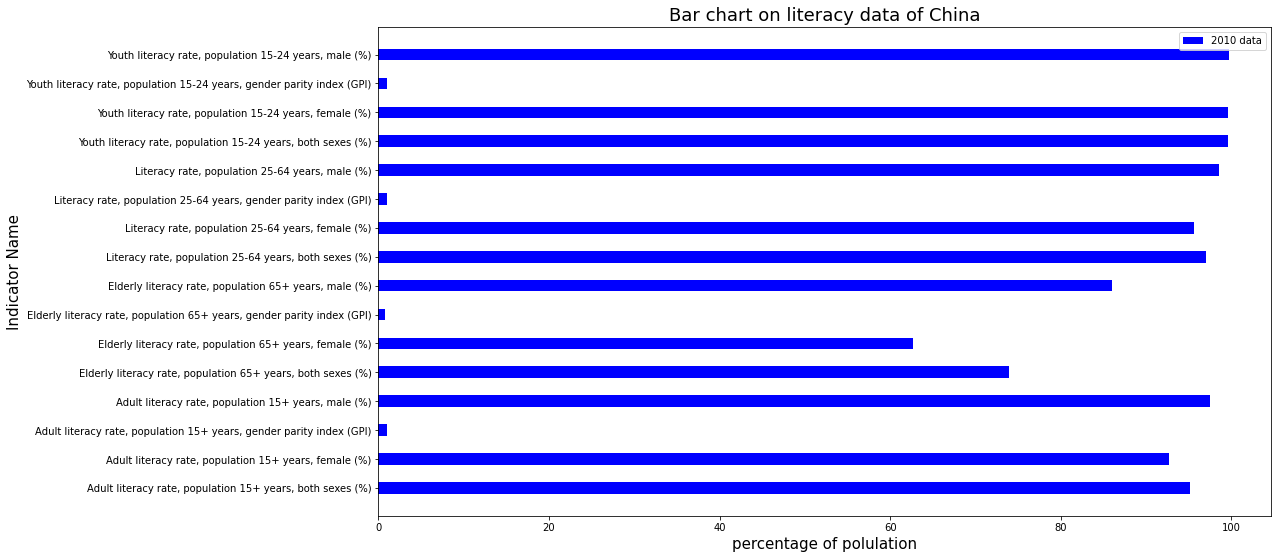

In [144]:
plt.figure(figsize=(16,9))
 
indicator_index = np.arange(len(china_literacy_data['Indicator Name']))
 
width = 0.4
 
plt.barh(indicator_index, china_literacy_data['2010'], width , color = "b",
        label ="2010 data") #visible=False
 
 
plt.yticks(indicator_index, china_literacy_data['Indicator Name'], rotation = 0)
plt.title("Bar chart on literacy data of China", fontsize = 18)
plt.ylabel("Indicator Name",fontsize = 15)
plt.xlabel("percentage of polulation", fontsize = 15)
plt.legend()
plt.show()

##Comparision between India ,china on various litercay related indicator

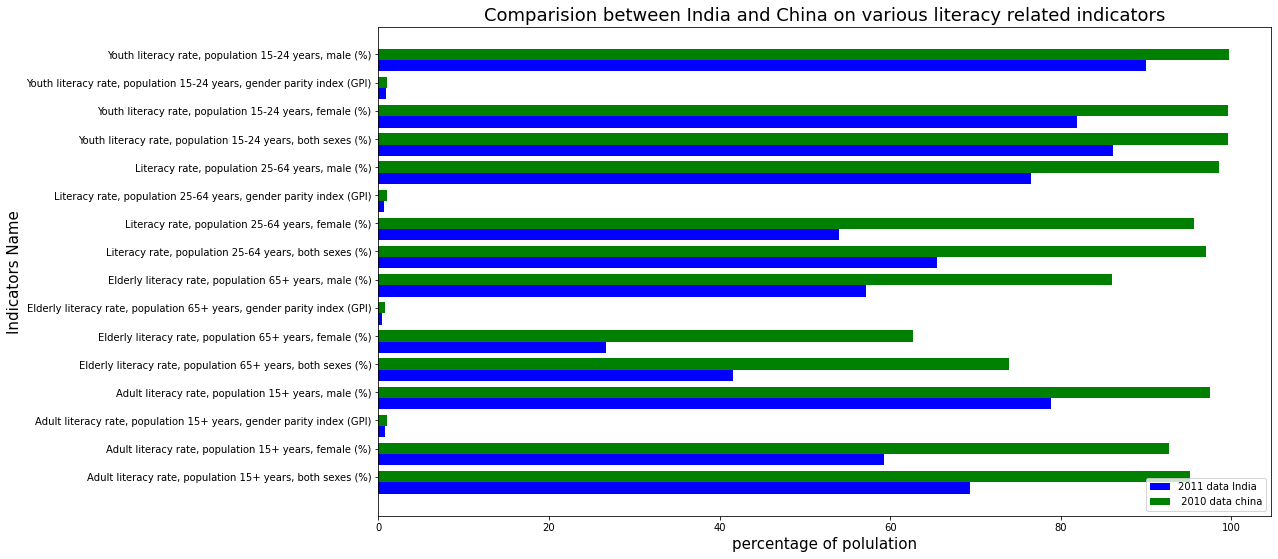

In [152]:
plt.figure(figsize=(16,9))
 
indicator_index = np.arange(len(india_literacy_table['Indicator Name']))
 
width = 0.4
 
plt.barh(indicator_index, india_literacy_table['2011'], width , color = "b",
        label ="2011 data India") #visible=False
 
plt.barh(indicator_index + width, china_literacy_data['2010'], width , color = "g",
        label =" 2010 data china") 
 
 
plt.yticks(indicator_index + width, india_literacy_table['Indicator Name'], rotation = 0)
plt.title("Comparision between India and China on various literacy related indicators", fontsize = 18)
plt.ylabel("Indicators Name",fontsize = 15)
plt.xlabel("percentage of polulation", fontsize = 15)
plt.legend()
plt.show()

##Comparision between India ,china,Pakistan on various litercay related indicator

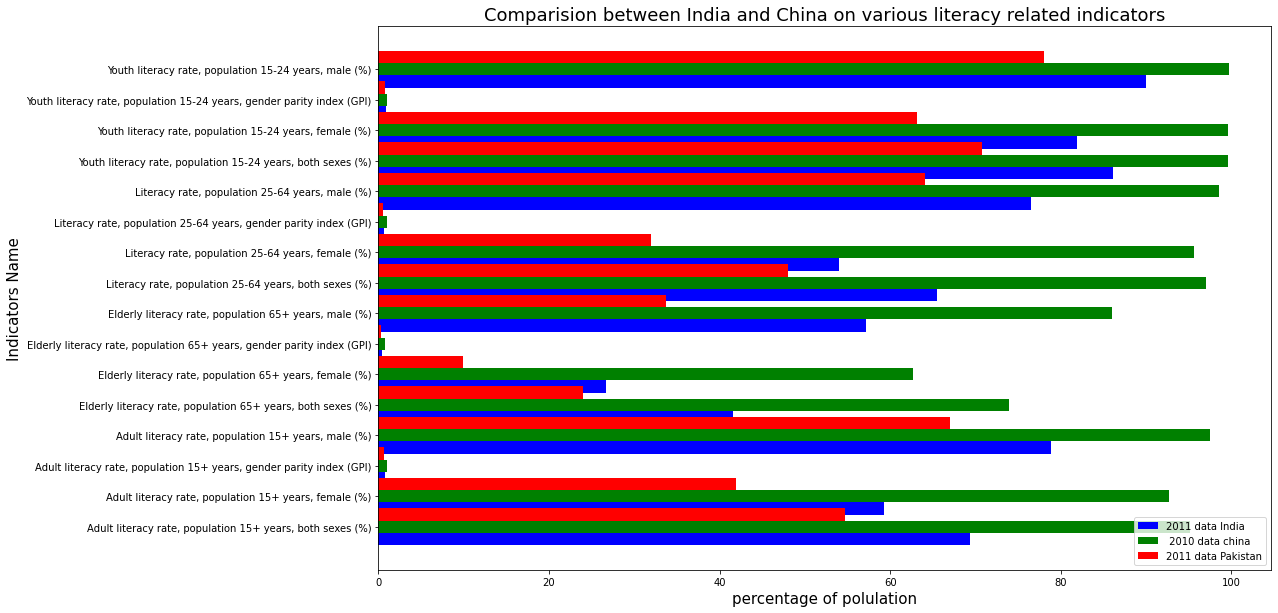

In [182]:
plt.figure(figsize=(16,10))
 
indicator_index = np.arange(len(india_literacy_table['Indicator Name']))
 
width = 0.4
 
plt.barh(indicator_index, india_literacy_table['2011'], width , color = "b",
        label ="2011 data India") #visible=False
 
plt.barh(indicator_index + width, china_literacy_data['2010'], width , color = "g",
        label =" 2010 data china") 
plt.barh(indicator_index+width+width,pakistan_literacy_table_new['2011'],width,color='r',
         label='2011 data Pakistan')
 
 
plt.yticks(indicator_index + width, india_literacy_table['Indicator Name'], rotation = 0)
plt.title("Comparision between India and China on various literacy related indicators", fontsize = 18)
plt.ylabel("Indicators Name",fontsize = 15)
plt.xlabel("percentage of polulation", fontsize = 15)
plt.legend()
plt.show()

#Let's do this analysis for Nigeria

In [90]:
Nigeria=stats_data.loc[stats_data['Country Name']=='Nigeria'].reset_index(drop=True)

In [91]:
Nigeria.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
0,Nigeria,NGA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nigeria,NGA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nigeria,NGA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nigeria,NGA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nigeria,NGA,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,68.075081,68.533096,71.355698,64.602531,65.681778,65.673653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# Let's filter out those rows only which contains the literacy data
nigeria_literacy_data=Nigeria[Nigeria['Indicator Name'].str.contains('literacy', regex=False, case=False, na=False)].reset_index(drop=True)

In [94]:
nigeria_literacy_data

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
0,Nigeria,NGA,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,NaN,NaN,NaN,51.07766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nigeria,NGA,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,41.38676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nigeria,NGA,"Adult literacy rate, population 15+ years, gen...",UIS.LR.AG15T99.GPI,NaN,NaN,NaN,0.67566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nigeria,NGA,"Adult literacy rate, population 15+ years, mal...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,61.25405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nigeria,NGA,"Elderly literacy rate, population 65+ years, b...",UIS.LR.AG65,NaN,NaN,NaN,21.55761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Nigeria,NGA,"Elderly literacy rate, population 65+ years, f...",UIS.LR.AG65.F,NaN,NaN,NaN,11.06294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Nigeria,NGA,"Elderly literacy rate, population 65+ years, g...",UIS.LR.AG65.GPI,NaN,NaN,NaN,0.36763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Nigeria,NGA,"Elderly literacy rate, population 65+ years, m...",UIS.LR.AG65.M,NaN,NaN,NaN,30.09226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Nigeria,NGA,"Literacy rate, population 25-64 years, both se...",UIS.LR.AG25T64,NaN,NaN,NaN,47.54523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Nigeria,NGA,"Literacy rate, population 25-64 years, female (%)",UIS.LR.AG25T64.F,NaN,NaN,NaN,36.78961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#We don't have sufficient data to compare between different years but we have it for one year 2008

In [95]:
nigeria_literacy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    50 non-null     object 
 1   Country Code    50 non-null     object 
 2   Indicator Name  50 non-null     object 
 3   Indicator Code  50 non-null     object 
 4   2005            0 non-null      float64
 5   2006            0 non-null      float64
 6   2007            0 non-null      float64
 7   2008            16 non-null     float64
 8   2009            0 non-null      float64
 9   2010            0 non-null      float64
 10  2011            0 non-null      float64
 11  2012            0 non-null      float64
 12  2013            0 non-null      float64
 13  2014            0 non-null      float64
 14  2014            0 non-null      float64
 15  2015            0 non-null      float64
 16  2016            0 non-null      float64
 17  2017            0 non-null      float

In [97]:
# Updating our data frame 
nigeria_literacy_data=nigeria_literacy_data[['Indicator Name','2008']]



In [98]:
nigeria_literacy_data

,Indicator Name,2008
0,"Adult literacy rate, population 15+ years, bot...",51.07766
1,"Adult literacy rate, population 15+ years, fem...",41.38676
2,"Adult literacy rate, population 15+ years, gen...",0.67566
3,"Adult literacy rate, population 15+ years, mal...",61.25405
4,"Elderly literacy rate, population 65+ years, b...",21.55761
5,"Elderly literacy rate, population 65+ years, f...",11.06294
6,"Elderly literacy rate, population 65+ years, g...",0.36763
7,"Elderly literacy rate, population 65+ years, m...",30.09226
8,"Literacy rate, population 25-64 years, both se...",47.54523
9,"Literacy rate, population 25-64 years, female (%)",36.78961


In [103]:
# Removing the rows having 2008 column NaN value
nigeria_literacy_data.dropna(subset=['2008'],inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
nigeria_literacy_data

,Indicator Name,2008
0,"Adult literacy rate, population 15+ years, bot...",51.07766
1,"Adult literacy rate, population 15+ years, fem...",41.38676
2,"Adult literacy rate, population 15+ years, gen...",0.67566
3,"Adult literacy rate, population 15+ years, mal...",61.25405
4,"Elderly literacy rate, population 65+ years, b...",21.55761
5,"Elderly literacy rate, population 65+ years, f...",11.06294
6,"Elderly literacy rate, population 65+ years, g...",0.36763
7,"Elderly literacy rate, population 65+ years, m...",30.09226
8,"Literacy rate, population 25-64 years, both se...",47.54523
9,"Literacy rate, population 25-64 years, female (%)",36.78961


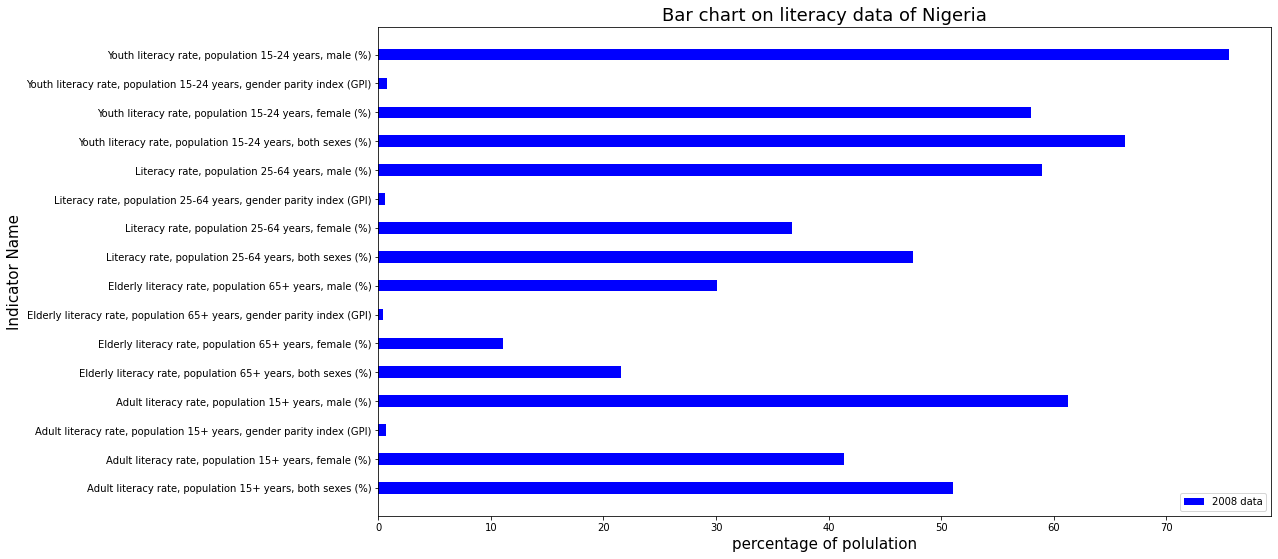

In [143]:
plt.figure(figsize=(16,9))
 
indicator_index = np.arange(len(nigeria_literacy_data['Indicator Name']))
 
width = 0.4
 
plt.barh(indicator_index, nigeria_literacy_data['2008'], width , color = "b",
        label ="2008 data") #visible=False
 
 
plt.yticks(indicator_index, nigeria_literacy_data['Indicator Name'], rotation = 0)
plt.title("Bar chart on literacy data of Nigeria", fontsize = 18)
plt.ylabel("Indicator Name",fontsize = 15)
plt.xlabel("percentage of polulation", fontsize = 15)
plt.legend()
plt.show()

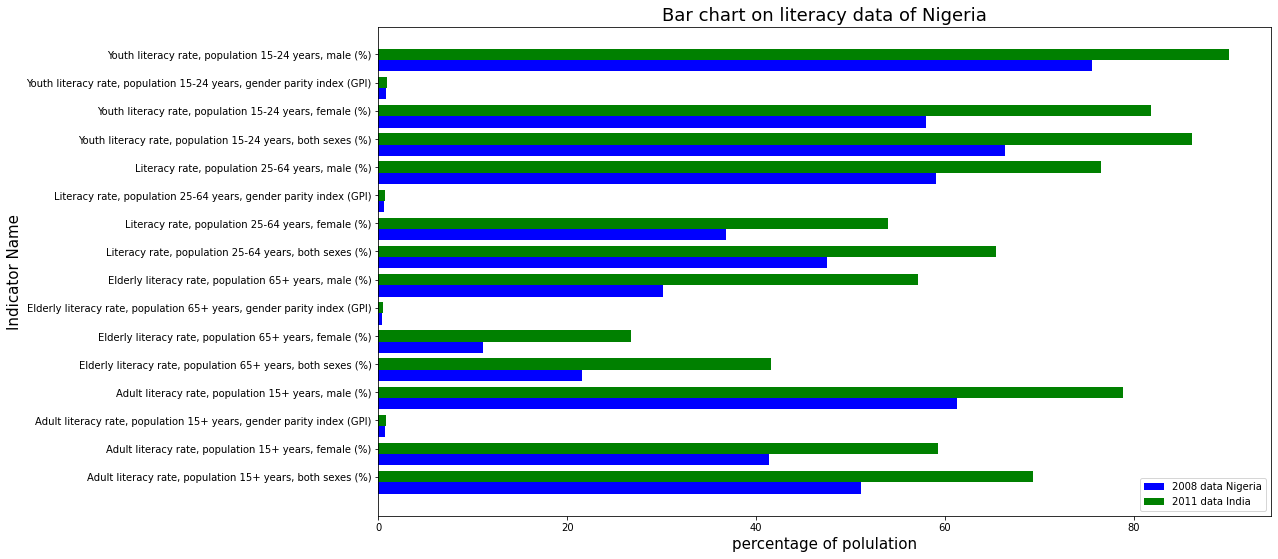

In [187]:
plt.figure(figsize=(16,9))
 
indicator_index = np.arange(len(nigeria_literacy_data['Indicator Name']))
 
width = 0.4
 
plt.barh(indicator_index, nigeria_literacy_data['2008'], width , color = "b",
        label ="2008 data Nigeria") #visible=False
plt.barh(indicator_index+width, india_literacy_table['2011'], width , color = "g",
        label ="2011 data India")
 
 
plt.yticks(indicator_index+width, nigeria_literacy_data['Indicator Name'], rotation = 0)
plt.title("Bar chart on literacy data of Nigeria", fontsize = 18)
plt.ylabel("Indicator Name",fontsize = 15)
plt.xlabel("percentage of polulation", fontsize = 15)
plt.legend()
plt.show()

In [85]:
stats_data.loc[stats_data['Country Name']=='India','Indicator Name'].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

In [ ]:
country.shape

(233, 28)